In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/sali-31/Spotify-Streaming-Analysis/refs/heads/main/train.csv")
df.head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [7]:
df = df.dropna()

In [8]:
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [10]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [11]:
#df[df.duplicated()]

In [12]:
cols_to_convert = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df = df.astype({col: 'string' for col in cols_to_convert})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  string 
 1   artists           113999 non-null  string 
 2   album_name        113999 non-null  string 
 3   track_name        113999 non-null  string 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [14]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


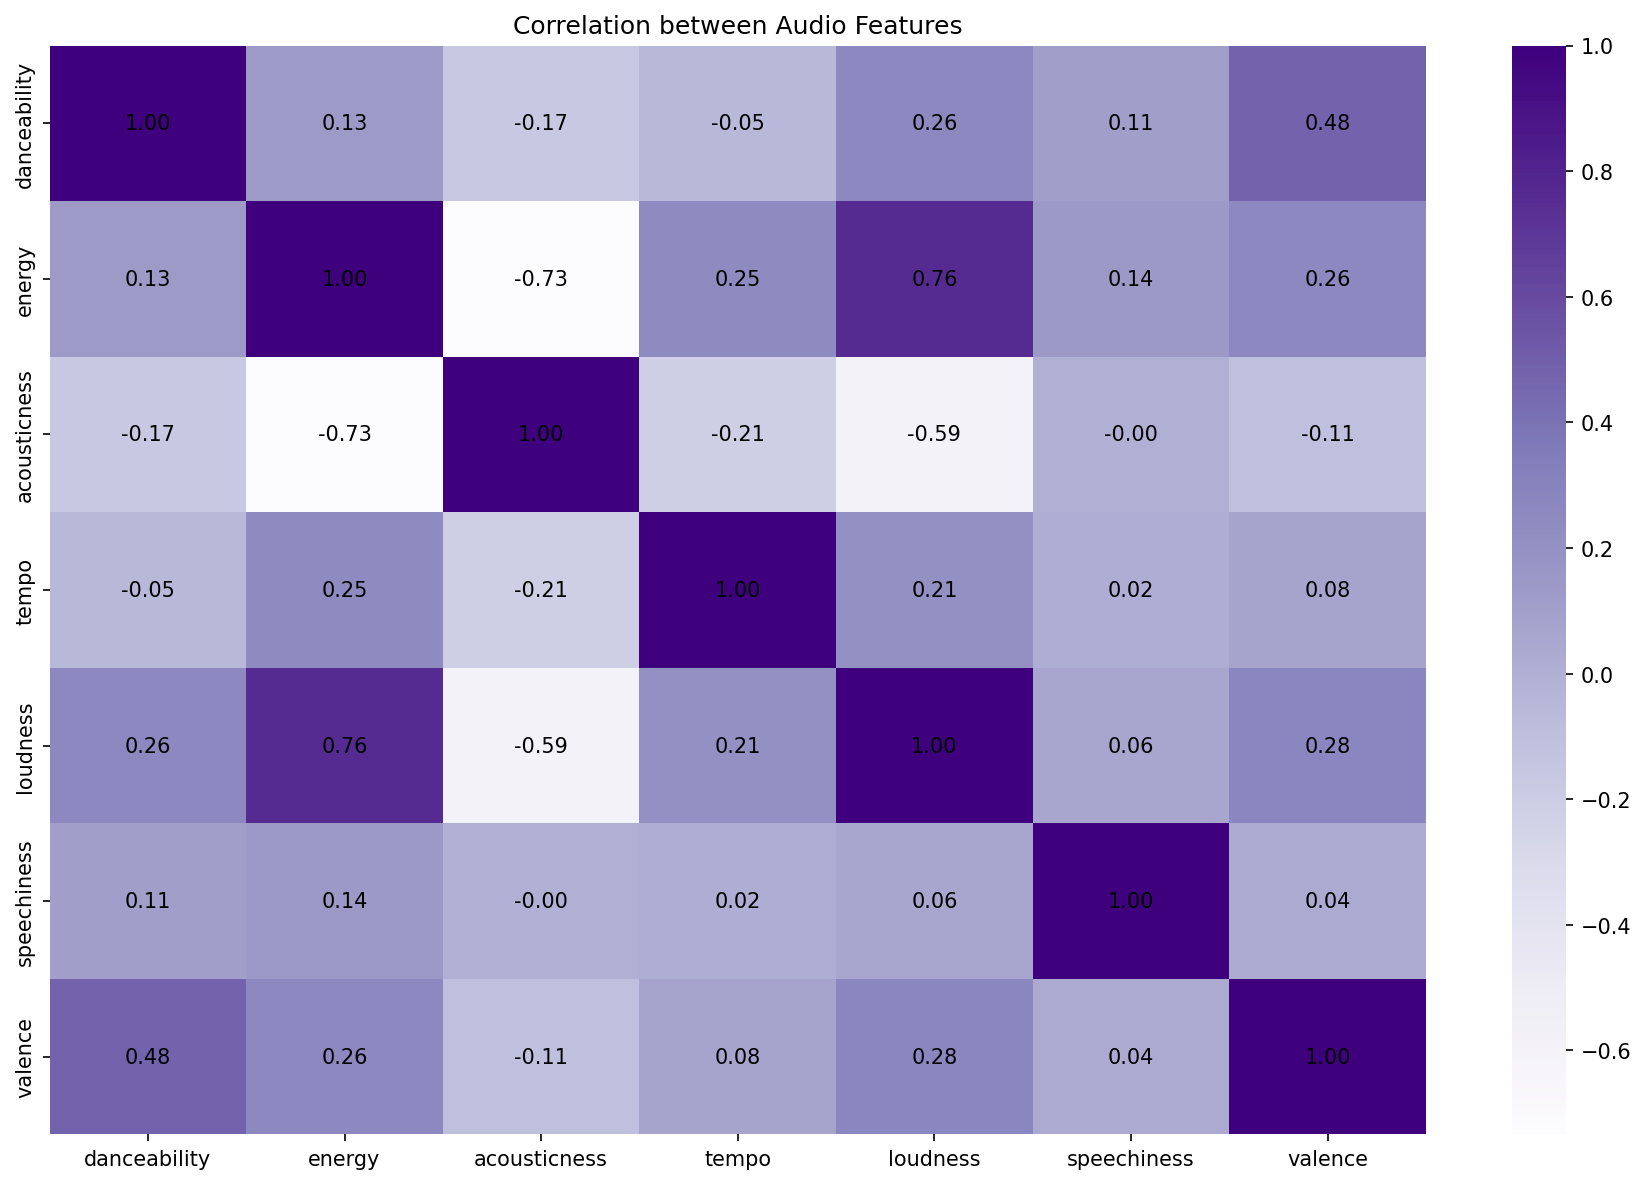

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

continuous = ['danceability','energy','acousticness','tempo','loudness','speechiness','valence']
corr = df[continuous].corr().to_numpy()
labels = continuous

fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

sns.heatmap(
    corr,
    cmap="Purples",
    xticklabels=labels,
    yticklabels=labels,
    cbar=True,
    ax=ax
)

# Manually add text (guaranteed visible)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j + 0.5, i + 0.5, f"{corr[i, j]:.2f}",
                ha="center", va="center", color="black", fontsize=10)

ax.set_title("Correlation between Audio Features")
plt.tight_layout()
plt.show()


In [18]:
#sns.pairplot(df[continuous])

/var/folders/cj/278_80095qv8y98mk__5kfzw0000gn/T/ipykernel_14402/1546589425.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_loudness = df.groupby('energy_bin')['loudness'].mean()


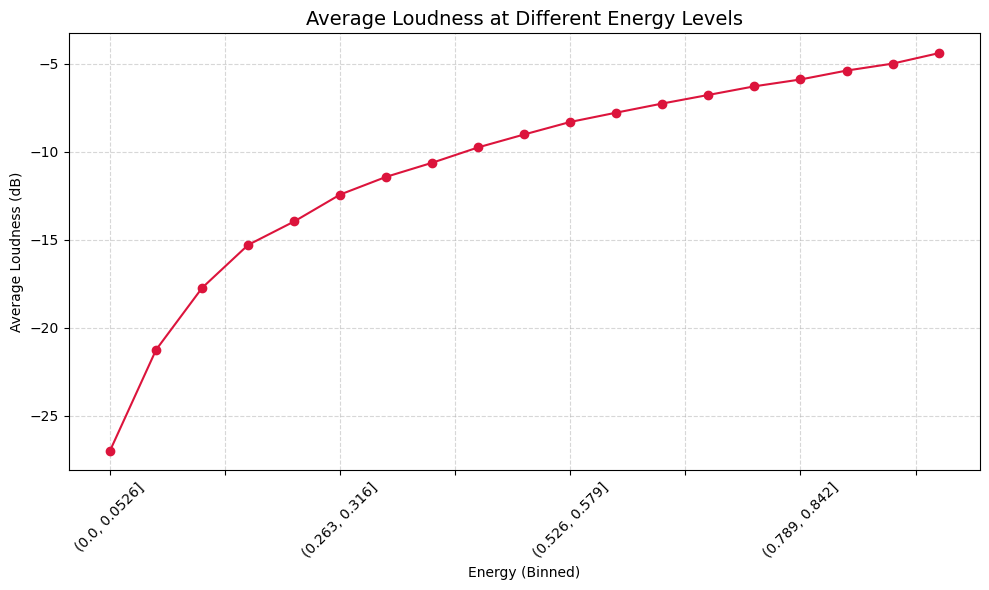

In [19]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=df['energy'], y=df['loudness'], alpha=0.4, color='crimson')
# plt.title("Distribution of Songs by Energy and Loudness", fontsize=12)
# plt.xlabel("Energy")
# plt.ylabel("Loudness (dB)")
# plt.tight_layout()

# Duplicates were dropped

# 1. Create energy bins (split energy 0–1 into 20 pieces)
df['energy_bin'] = pd.cut(df['energy'], bins=np.linspace(0, 1, 20))

# 2. Group by energy_bin and calculate average loudness
avg_loudness = df.groupby('energy_bin')['loudness'].mean()

plt.figure(figsize=(10, 6))
avg_loudness.plot(kind='line', marker='o', color='crimson')
plt.title("Average Loudness at Different Energy Levels", fontsize=14)
plt.xlabel("Energy (Binned)")
plt.ylabel("Average Loudness (dB)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/cj/278_80095qv8y98mk__5kfzw0000gn/T/ipykernel_14402/378521634.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_acousticness = df.groupby('energy_bin')['acousticness'].mean()


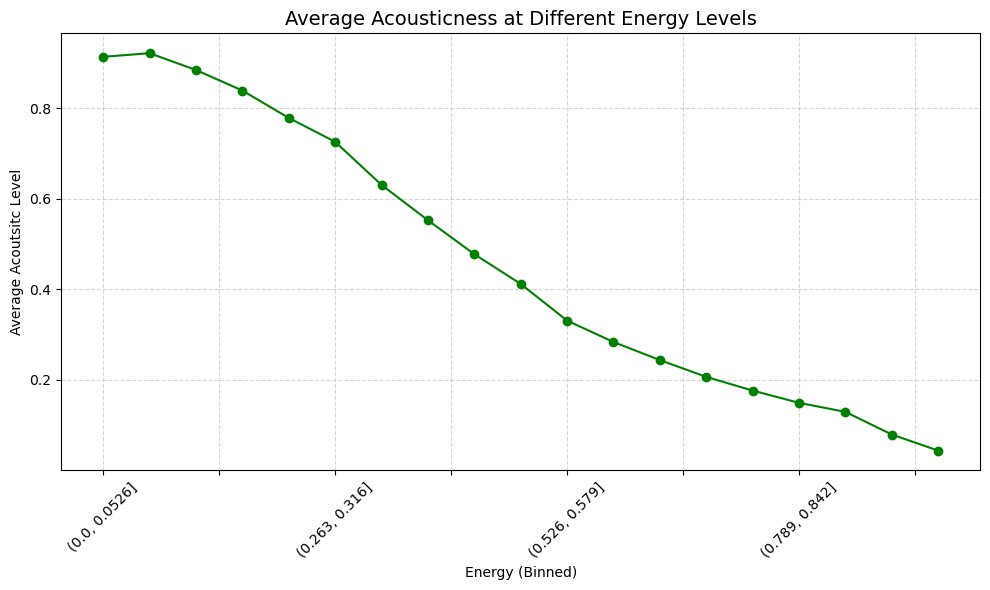

In [20]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=df['energy'], y=df['acousticness'], alpha=0.3, color='green')
# plt.title("Distribution of Songs by Energy and Acousticness", fontsize=12)
# plt.xlabel("Energy")
# plt.ylabel("Acousticness")
# plt.tight_layout()

# Duplicates were dropped

# 1. Create energy bins (split energy 0–1 into 20 pieces)
df['energy_bin'] = pd.cut(df['energy'], bins=np.linspace(0, 1, 20))

avg_acousticness = df.groupby('energy_bin')['acousticness'].mean()

plt.figure(figsize=(10, 6))
avg_acousticness.plot(kind='line', marker='o', color='green')
plt.title("Average Acousticness at Different Energy Levels", fontsize=14)
plt.xlabel("Energy (Binned)")
plt.ylabel("Average Acoutsitc Level")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/cj/278_80095qv8y98mk__5kfzw0000gn/T/ipykernel_14402/787872985.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_loudness_by_acousticness = df.groupby('acousticness_bin')['loudness'].mean()


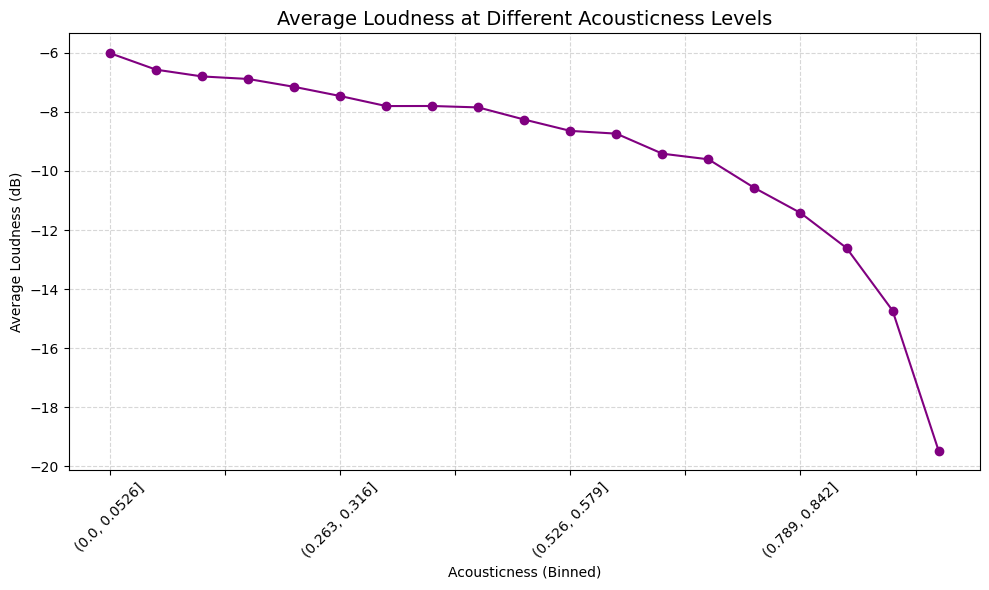

In [21]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=df['acousticness'], y=df['loudness'], alpha=0.4, color='purple')
# plt.title("Distribution of Songs by Acousticness and Loudness", fontsize=12)
# plt.xlabel("Acousticness")
# plt.ylabel("Loudness (dB)")
# plt.tight_layout()

# Duplicates were dropped

# 1. Create bins for acousticness (split from 0 to 1)
df['acousticness_bin'] = pd.cut(df['acousticness'], bins=np.linspace(0, 1, 20))

avg_loudness_by_acousticness = df.groupby('acousticness_bin')['loudness'].mean()

plt.figure(figsize=(10, 6))
avg_loudness_by_acousticness.plot(kind='line', marker='o', color='purple')
plt.title("Average Loudness at Different Acousticness Levels", fontsize=14)
plt.xlabel("Acousticness (Binned)")
plt.ylabel("Average Loudness (dB)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/cj/278_80095qv8y98mk__5kfzw0000gn/T/ipykernel_14402/270443275.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_loudness_by_acousticness = df.groupby('valence_bin')['danceability'].mean()


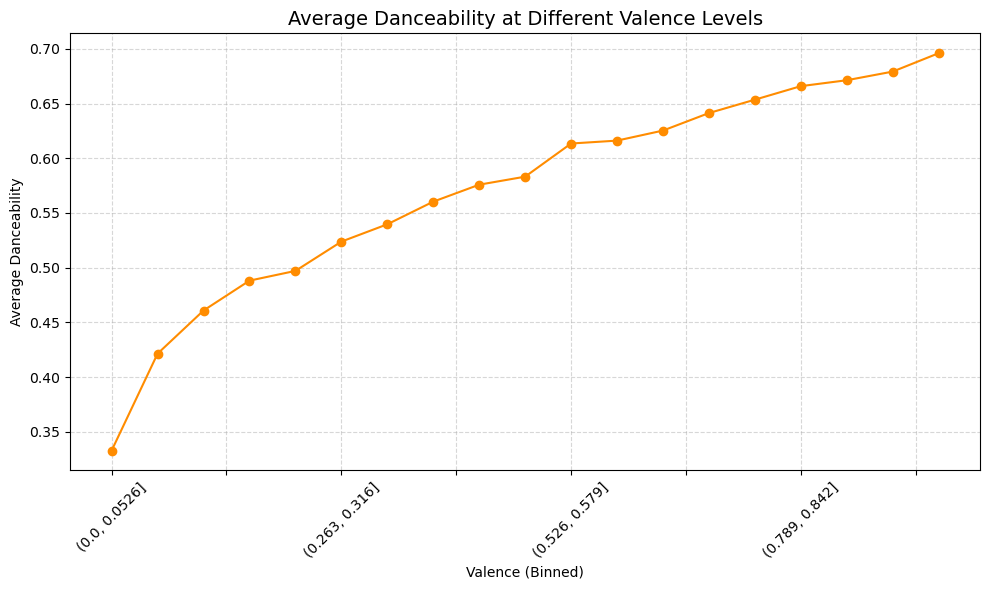

In [22]:
# Duplicates were dropped

df['valence_bin'] = pd.cut(df['valence'], bins=np.linspace(0, 1, 20))

avg_loudness_by_acousticness = df.groupby('valence_bin')['danceability'].mean()

plt.figure(figsize=(10, 6))
avg_loudness_by_acousticness.plot(kind='line', marker='o', color='darkorange')
plt.title("Average Danceability at Different Valence Levels", fontsize=14)
plt.xlabel("Valence (Binned)")
plt.ylabel("Average Danceability")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/cj/278_80095qv8y98mk__5kfzw0000gn/T/ipykernel_14402/4087981188.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_loudness_by_acousticness = df.groupby('tempo_bin')['loudness'].mean()


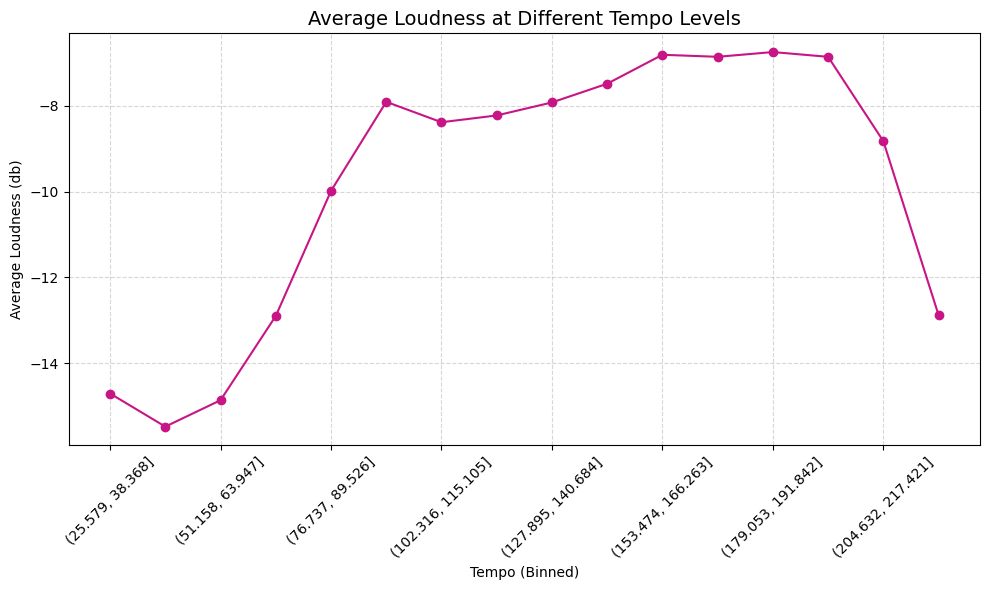

In [23]:
# 1. Create bins for acousticness (split from 0 to 1)
# Duplicates were dropped

df['tempo_bin'] = pd.cut(df['tempo'], bins=np.linspace(0, 243, 20))

avg_loudness_by_acousticness = df.groupby('tempo_bin')['loudness'].mean()

plt.figure(figsize=(10, 6))
avg_loudness_by_acousticness.plot(kind='line', marker='o', color='mediumvioletred')
plt.title("Average Loudness at Different Tempo Levels", fontsize=14)
plt.xlabel("Tempo (Binned)")
plt.ylabel("Average Loudness (db)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


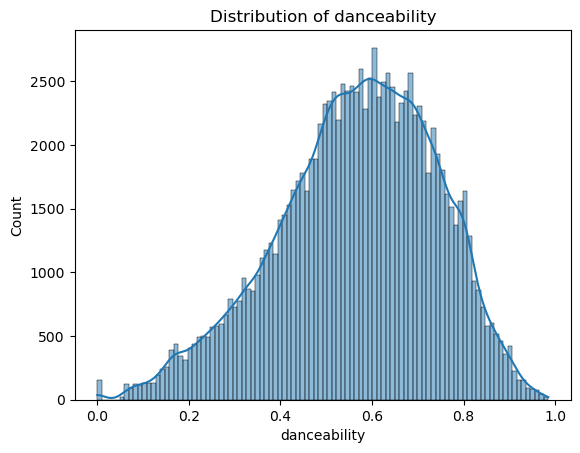

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


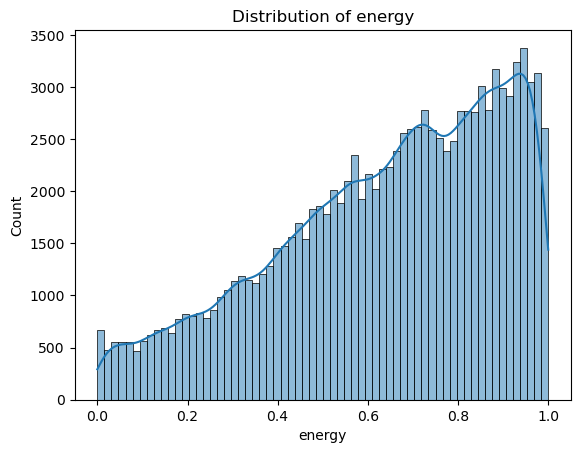

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


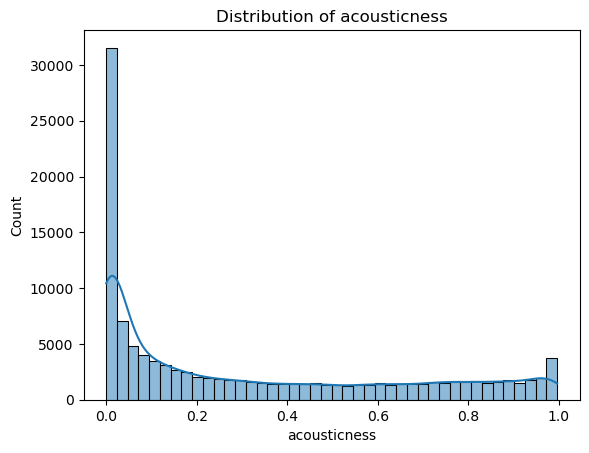

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


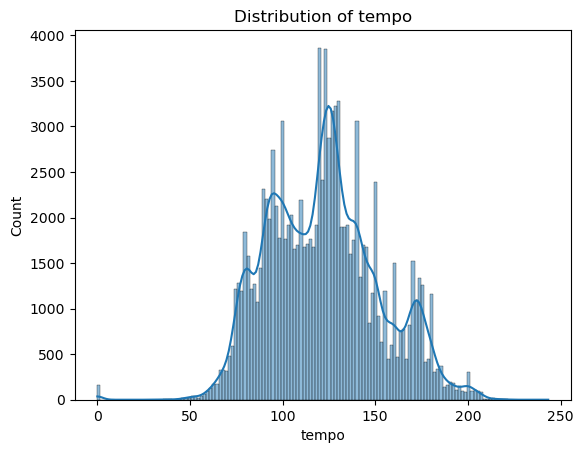

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


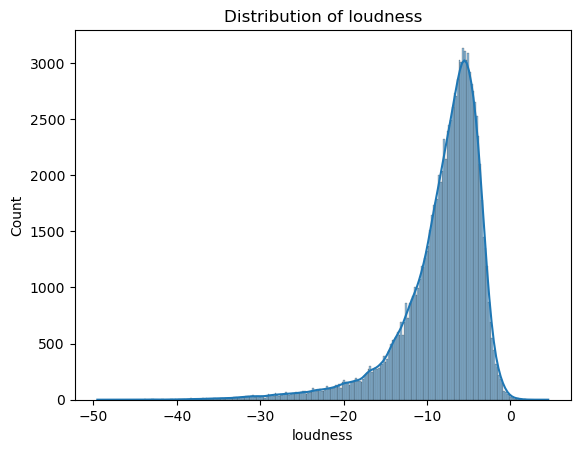

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


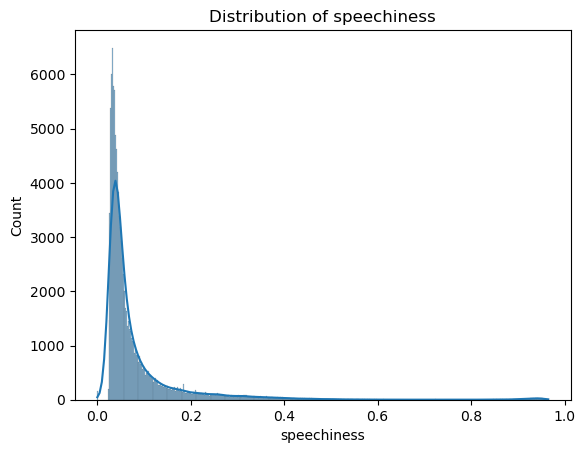

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


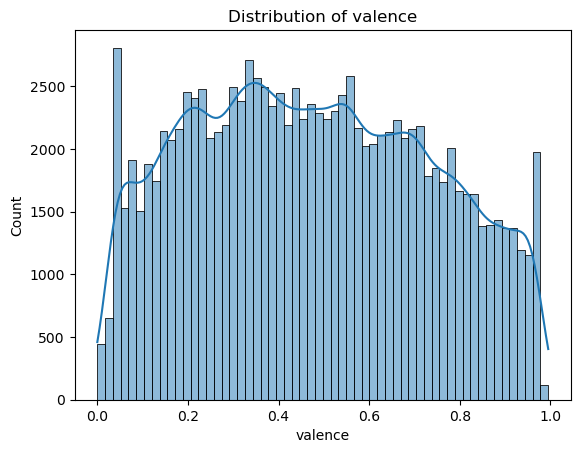

In [24]:
for col in continuous:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
     

In [25]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'energy_bin',
       'acousticness_bin', 'valence_bin', 'tempo_bin'],
      dtype='object')

<Axes: title={'center': 'Top 10 Genres Occurence'}, xlabel='track_genre', ylabel='Counts'>

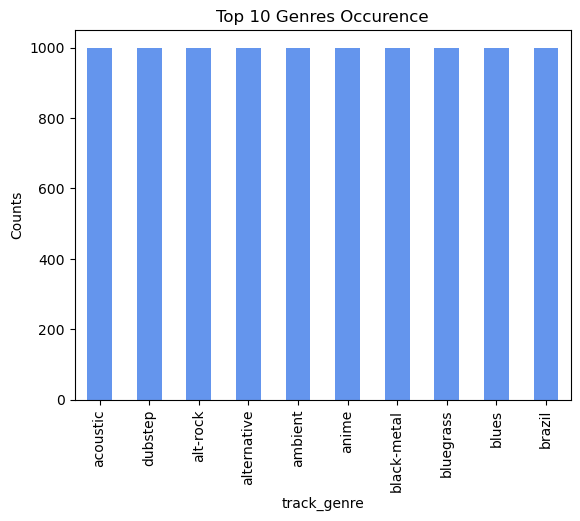

In [26]:
# Top 10 Genres, Artsts, Albums that occurs frequently in the dataset?
plt.title("Top 10 Genres Occurence")
plt.ylabel("Counts")
df['track_genre'].value_counts().nlargest(10).plot(kind='bar', color="cornflowerblue")

<Axes: title={'center': 'Top 10 Artists Occurence'}, xlabel='artists', ylabel='Counts'>

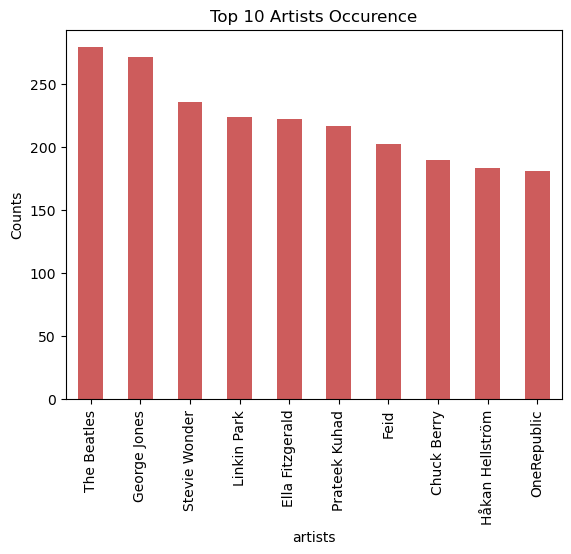

In [27]:
plt.title("Top 10 Artists Occurence")
plt.ylabel("Counts")
df['artists'].value_counts().nlargest(10).plot(kind='bar', color='indianred')

<Axes: title={'center': 'Top 10 Albums Occurence'}, xlabel='album_name', ylabel='Counts'>

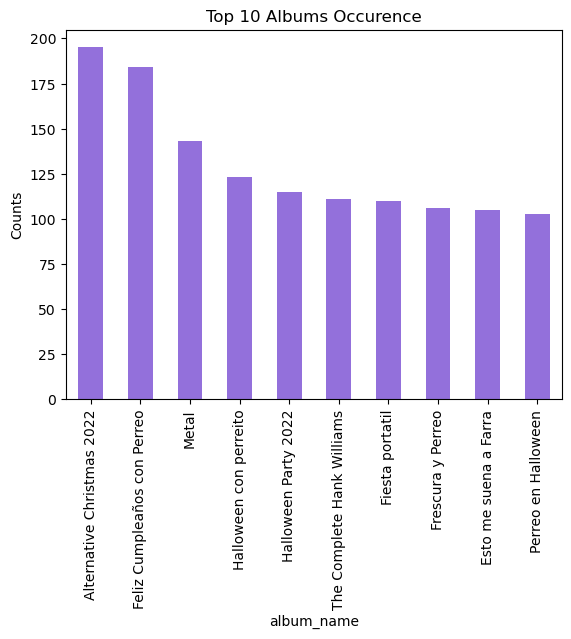

In [28]:
plt.title("Top 10 Albums Occurence")
plt.ylabel("Counts")
df['album_name'].value_counts().nlargest(10).plot(kind='bar', color='mediumpurple')

In [29]:
df['artists'].value_counts().nlargest(10)

artists
The Beatles        279
George Jones       271
Stevie Wonder      236
Linkin Park        224
Ella Fitzgerald    222
Prateek Kuhad      217
Feid               202
Chuck Berry        190
Håkan Hellström    183
OneRepublic        181
Name: count, dtype: Int64

In [30]:
#df[df['artists'] == "The Beatles"]['track_name'].unique()
#df[df['artists'] == "George Jones"]['track_name'].unique()
#df[df['artists'] == "Stevie Wonder"]['track_name'].unique()
#df[df['artists'] == "Linkin Park"]['track_name'].unique()
#df[df['artists'] == "Ella Fitzgerald"]['track_name'].unique()
#df[df['artists'] == "Prateek Kuhad"]['track_name'].unique()
#df[df['artists'] == "Feid"]['track_name'].unique()
#df[df['artists'] == "Chuck Berry"]['track_name'].unique()
#df[df['artists'] == "Håkan Hellström"]['track_name'].unique()
#df[df['artists'] == "OneRepublic"]['track_name'].unique()

Text(0, 0.5, '')

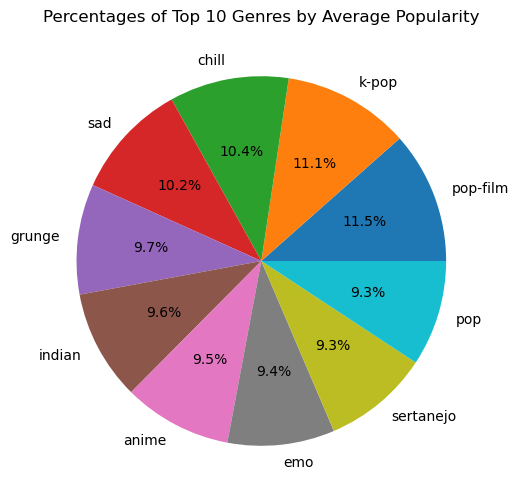

In [31]:
# Analysis 1: Average Popular Track Genres:
plt.figure(figsize=(10,6))
df.groupby("track_genre")['popularity'].mean().nlargest(10).plot(kind='pie', autopct='%1.1f%%', title="Percentages of Top 10 Genres by Average Popularity")
plt.ylabel('')

Text(0, 0.5, '')

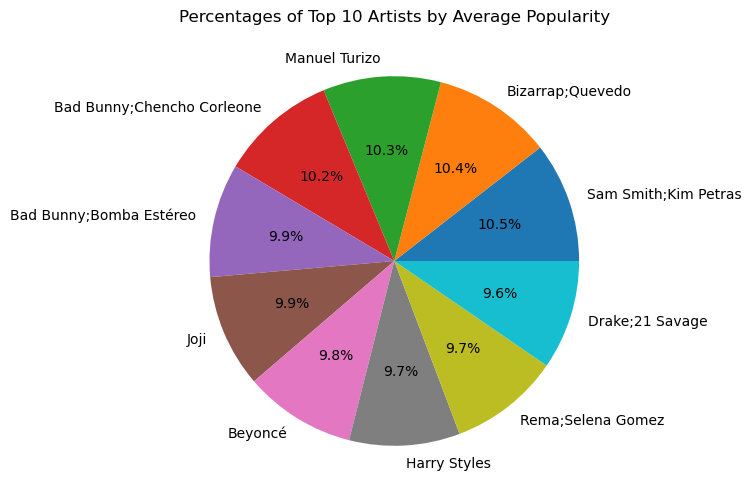

In [32]:
# Analysis 2: Average Popular Artists:
plt.figure(figsize=(10,6))
df.groupby("artists")['popularity'].mean().nlargest(10).plot(kind='pie', autopct='%1.1f%%', title="Percentages of Top 10 Artists by Average Popularity")
plt.ylabel('')

In [33]:
df.groupby("artists")['popularity'].mean().nlargest(10)

artists
Sam Smith;Kim Petras          100.0
Bizarrap;Quevedo               99.0
Manuel Turizo                  98.0
Bad Bunny;Chencho Corleone     97.0
Bad Bunny;Bomba Estéreo        94.5
Joji                           94.0
Beyoncé                        93.0
Harry Styles                   92.0
Rema;Selena Gomez              92.0
Drake;21 Savage                91.0
Name: popularity, dtype: float64

In [34]:
# df[df['artists'] == "Sam Smith;Kim Petras"]['track_genre'].unique()
# df[df['artists'] == "Bizarrap;Quevedo"]['track_genre'].unique()
# df[df['artists'] == "Manuel Turizo"]['track_genre'].unique()
# df[df['artists'] == "Bad Bunny;Chencho Corleone"]['track_genre'].unique()
# df[df['artists'] == "Bad Bunny;Bomba Estéreo"]['track_genre'].unique()
# df[df['artists'] == "Joji"]['track_genre'].unique()
# df[df['artists'] == "Beyoncé"]['track_genre'].unique()
# df[df['artists'] == "Harry Styles"]['track_genre'].unique()
# df[df['artists'] == "Rema;Selena Gomez"]['track_genre'].unique()
# df[df['artists'] == "Rema;Selena Gomez"]['track_genre'].unique()
# df[df['artists'] == "Drake;21 Savage"]['track_genre'].unique()

Slope: -0.970225293890349
Intercept: 0.9371930443352805
R: -0.7339082934928874
P: 0.0


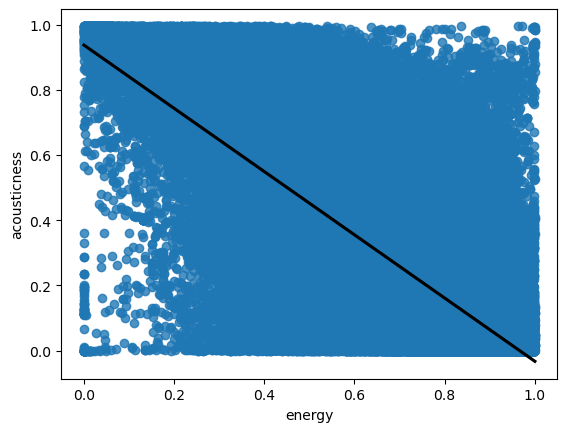

In [35]:
#Analysis 3: Linear Regression: Acousticness vs Energy:
#Duplicates were dropped

sns.regplot(df, x="energy", y="acousticness", line_kws={'color': 'black'})
result = stats.linregress(df['energy'], df['acousticness'])
print("Slope:", result.slope)
print("Intercept:", result.intercept)
print("R:", result.rvalue)
print("P:", result.pvalue)

In [37]:
# Analysis 4: K-Means Clustering

df = df[[
    'explicit', 'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo',
]]

# Encode Explicit Column:
df_binary = df[['explicit']].copy()
df_binary['explicit'] = [1 if x else 0 for x in df['explicit']]

# Separate the numeric columns
df_numeric = df[[
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]]

# Pre-Process the data:
df_preprocessed = pd.concat([
    df_numeric,
    df_binary,
], axis=1)

df_preprocessed

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,0
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,0
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,0
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,0
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,0
...,...,...,...,...,...,...,...,...,...,...
113995,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,0
113996,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,0
113997,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,0
113998,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,0


In [38]:
# Normalize Values:

df_preprocessed_norm = pd.concat([
    (df_numeric - df_numeric.mean())/df_numeric.std(),
    df_binary,
], axis=1)

df_preprocessed_norm

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit
0,0.629236,-0.717144,0.300824,0.551841,-0.850189,-0.504109,0.758732,0.929311,-1.141849,0
1,-0.845904,-1.889966,-1.784731,-0.078995,1.831736,-0.504094,-0.591213,-0.798677,-1.489701,0
2,-0.742184,-1.122662,-0.293288,-0.273825,-0.315488,-0.504112,-0.507170,-1.365673,-1.528296,0
3,-1.733293,-2.312977,-2.039237,-0.457307,1.774597,-0.503884,-0.428379,-1.276960,1.987849,0
4,0.295024,-0.788706,-0.282750,-0.303145,0.463407,-0.504112,-0.686287,-1.184389,-0.073343,0
...,...,...,...,...,...,...,...,...,...,...
113995,-2.274946,-1.615645,-1.617314,-0.401506,0.977658,2.493731,-0.668428,-1.697771,0.128336,0
113996,-2.263422,-2.084773,-2.000067,-0.421367,2.042249,2.648792,-0.570202,-1.693528,-1.231181,0
113997,0.358409,-1.241932,-0.524133,-0.403397,1.660319,-0.504112,-0.681035,1.037310,0.341257,0
113998,0.116394,-0.538239,-0.522940,-0.519728,0.198763,-0.504112,0.296494,-0.235538,0.460744,0


In [39]:
kmeans = KMeans(n_clusters=9, n_init='auto')
df_preprocessed['cluster'] = kmeans.fit_predict(df_preprocessed_norm)
df_preprocessed.groupby('cluster').mean().T

cluster,0,1,2,3,4,5,6,7,8
danceability,0.410297,0.744811,0.343761,0.572617,0.599502,0.548430,0.523460,0.517138,0.633974
energy,0.831950,0.662182,0.168462,0.671824,0.732590,0.748759,0.751344,0.349954,0.787337
loudness,-5.154727,-7.083458,-21.329679,-11.210578,-8.575140,-5.972329,-7.069093,-11.071952,-5.763007
speechiness,0.103251,0.113647,0.050691,0.839660,0.069585,0.061549,0.084666,0.050016,0.077406
acousticness,0.076224,0.267241,0.864695,0.738496,0.119930,0.099282,0.288708,0.729040,0.187535
instrumentalness,0.066583,0.016952,0.801750,0.010101,0.800392,0.027408,0.068136,0.030438,0.021736
liveness,0.209387,0.154834,0.162498,0.658521,0.166081,0.174399,0.753376,0.159187,0.186346
valence,0.338399,0.694148,0.183663,0.440669,0.346843,0.351443,0.511420,0.377911,0.750622
tempo,160.680922,105.580232,102.928052,101.429188,125.539466,108.300281,122.650382,114.678435,145.870460
explicit,0.109356,0.160603,0.002649,0.559889,0.034040,0.098664,0.056507,0.027815,0.079654


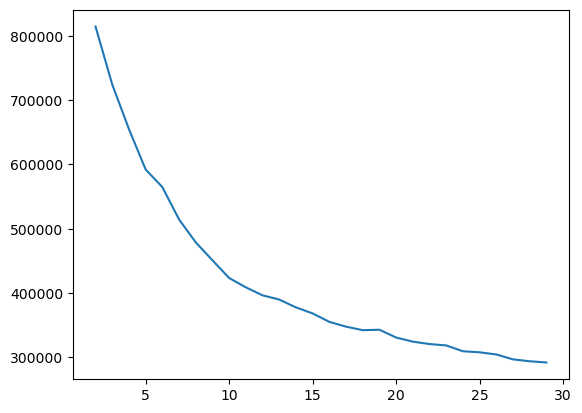

In [40]:
# Elbow Method for the number of clusters used:

inertias = []

for k in range(2, 30):
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(df_preprocessed_norm)
  inertias.append(kmeans.inertia_)

plt.plot(range(2, 30), inertias)

In [44]:
import pandas as pd

print("df shape:", df.shape)
print("df columns:", list(df.columns))

# show first rows (to confirm what dataset this is)
display(df.head())

# if you loaded from a csv, reload it and show its columns
# (replace filename with yours)
df_full = pd.read_csv("train.csv")
df_full.columns = df_full.columns.str.strip()
print("df_full shape:", df_full.shape)
print("df_full columns:", list(df_full.columns))
display(df_full.head())



df shape: (113999, 10)
df columns: ['explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,False,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949


df_full shape: (114000, 21)
df_full columns: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Slope: 15.230027331157535
Intercept: -18.02723457281913
R: 0.7616898441659467
P: 0.0


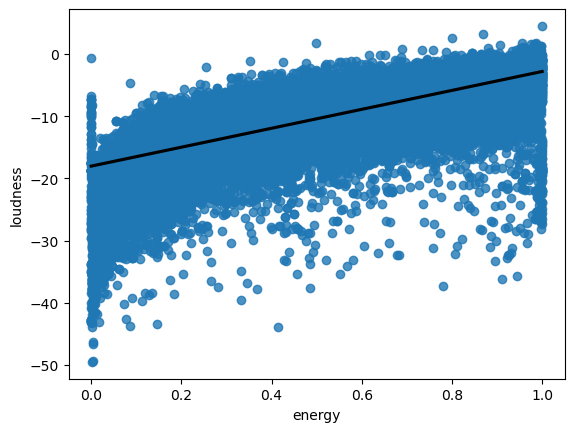

In [45]:
#Analysis 6: Linear Regression: Loudness vs Energy:
#Duplicates were dropped

sns.regplot(df, x="energy", y="loudness", line_kws={'color': 'black'})
result = stats.linregress(df['energy'], df['loudness'])
print("Slope:", result.slope)
print("Intercept:", result.intercept)
print("R:", result.rvalue)
print("P:", result.pvalue)

In [46]:
# just to refresh the data

df = pd.read_csv("https://raw.githubusercontent.com/sali-31/Spotify-Streaming-Analysis/refs/heads/main/train.csv")
df = df.dropna()
df = df.drop(columns=['Unnamed: 0'])
cols_to_convert = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df = df.astype({col: 'string' for col in cols_to_convert})
df.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic


In [47]:
df = df.drop_duplicates('track_id')

In [48]:
df[df.duplicated()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
